In [16]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("ticks")

## 1
кривые (x, y) = (date, mentions) для мужчин и женщин на одном графике для каждого из трех издания на основе данных 

### Deadline mentions per month

In [21]:
female_deadline_month = pd.read_csv('female_mentions_per_month_deadline_20190707.txt', sep = ',', header = None, names = ['year', 'month', 'count'])
female_deadline_month['date'] = female_deadline_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
female_deadline_month = female_deadline_month.sort_values(by='date')
female_deadline_month['date'] = female_deadline_month['date'].apply(lambda x: str(x.year)+'-'+str(x.month))

In [22]:
male_deadline_month = pd.read_csv('male_mentions_per_month_deadline_20190707.txt', sep = ',', header = None, names = ['year', 'month', 'count'])
male_deadline_month['date'] = male_deadline_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
male_deadline_month = male_deadline_month.sort_values(by='date')
male_deadline_month['date'] = male_deadline_month['date'].apply(lambda x: str(x.year)+'-'+str(x.month))

### Holywood reporter mentions per month

In [10]:
female_hwr_month = pd.read_csv('female_mentions_per_month_hollywood_reporter_20190707.txt', sep=',', header = None, names = ['year', 'month', 'count'])
female_hwr_month['date'] = female_hwr_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
female_hwr_month = female_hwr_month.sort_values(by='date')
female_hwr_month['date'] = female_hwr_month['date'].apply(lambda x: str(x.year)+'-'+str(x.month))

In [11]:
male_hwr_month = pd.read_csv('male_mentions_per_month_hollywood_reporter_20190707.txt', sep=',', header = None, names = ['year', 'month', 'count'])
male_hwr_month['date'] = male_hwr_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
male_hwr_month = male_hwr_month.sort_values(by='date')
male_hwr_month['date'] = male_hwr_month['date'].apply(lambda x: str(x.year)+'-'+str(x.month))

### Variety mentions per month

In [12]:
female_variety_month = pd.read_csv('female_mentions_per_month_variety_20190707.txt', sep=',', header = None, names = ['year', 'month', 'count'])
female_variety_month['date'] = female_variety_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
female_variety_month = female_variety_month.sort_values(by='date')
female_variety_month['date'] = female_variety_month['date'].apply(lambda x: str(x.year)+'-'+str(x.month))

In [13]:
male_variety_month = pd.read_csv('male_mentions_per_month_variety_20190707.txt', sep=',', header = None, names = ['year', 'month', 'count'])
male_variety_month['date'] = male_variety_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
male_variety_month = male_variety_month.sort_values(by='date')
male_variety_month['date'] = male_variety_month['date'].apply(lambda x: str(x.year)+'-'+str(x.month))

### Plot mentions

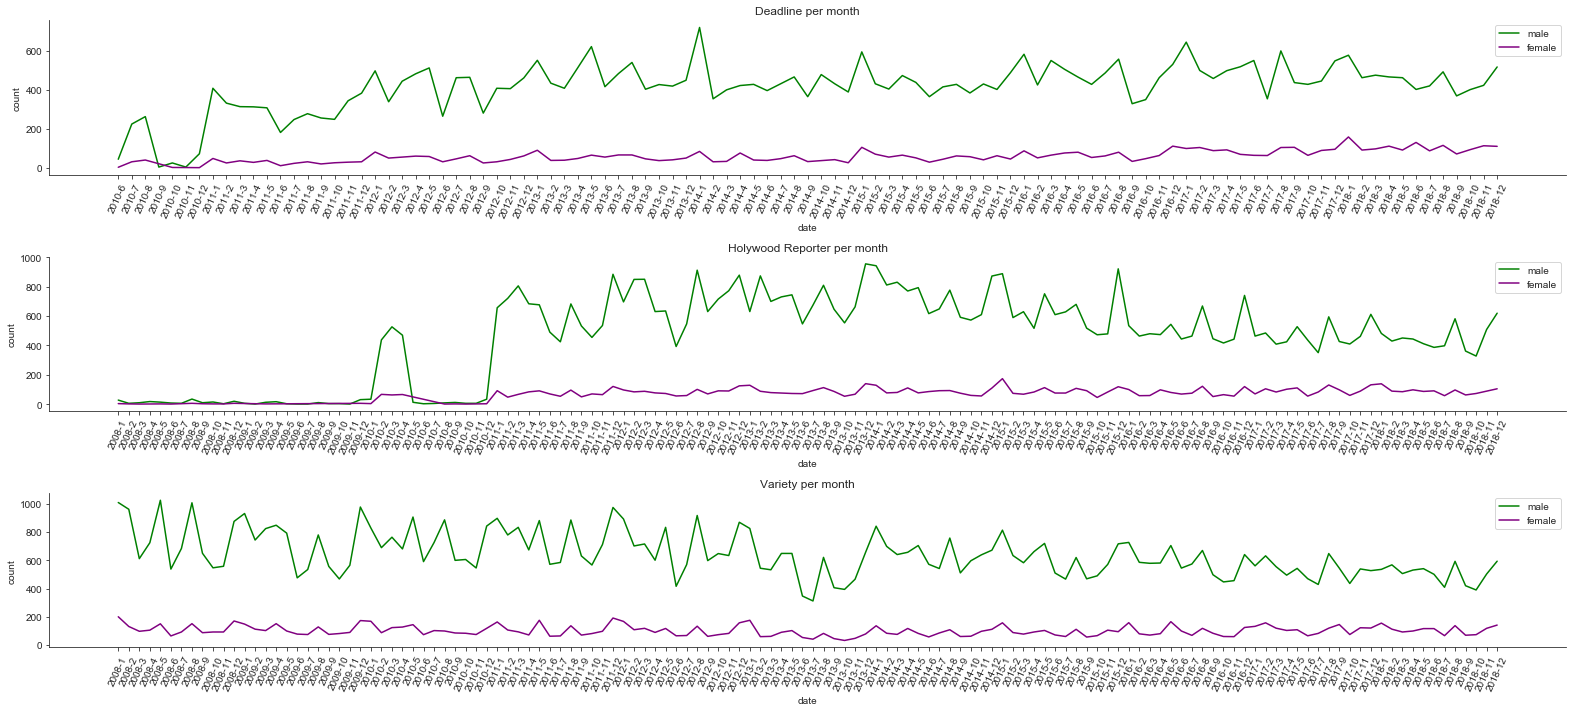

In [19]:
plt.figure(figsize=(22,10))

plt.title('Mentions of female and male directors per month')

plt.subplot(3,1,1)
sns.lineplot(x='date', y='count', data = male_deadline_month, color = 'green')
sns.lineplot(x='date', y='count', data = female_deadline_month, color = 'purple')
plt.title('Deadline per month')
plt.legend(('male', 'female'))
plt.xticks(range(len(male_deadline_month['date'].tolist())), male_deadline_month['date'].tolist())
plt.xticks(rotation=65)

plt.subplot(3,1,2)
sns.lineplot(x='date', y='count', data = male_hwr_month, color = 'green')
sns.lineplot(x='date', y='count', data = female_hwr_month, color = 'purple')
plt.title('Holywood Reporter per month')
plt.legend(('male', 'female'))
plt.xticks(rotation=65)
plt.xticks(range(len(male_hwr_month['date'].tolist())), male_hwr_month['date'].tolist())

plt.subplot(3,1,3)
sns.lineplot(x='date', y='count', data = male_variety_month, color = 'green')
sns.lineplot(x='date', y='count', data = female_variety_month, color = 'purple')
plt.title('Variety per month')
plt.legend(('male', 'female'))
plt.xticks(rotation=65)
plt.xticks(range(len(male_variety_month['date'].tolist())), male_variety_month['date'].tolist())

plt.tight_layout()
sns.despine()
plt.savefig('mentions_per_month.png', dpi=300, format='png')
plt.show()

### Mentions per month barchart

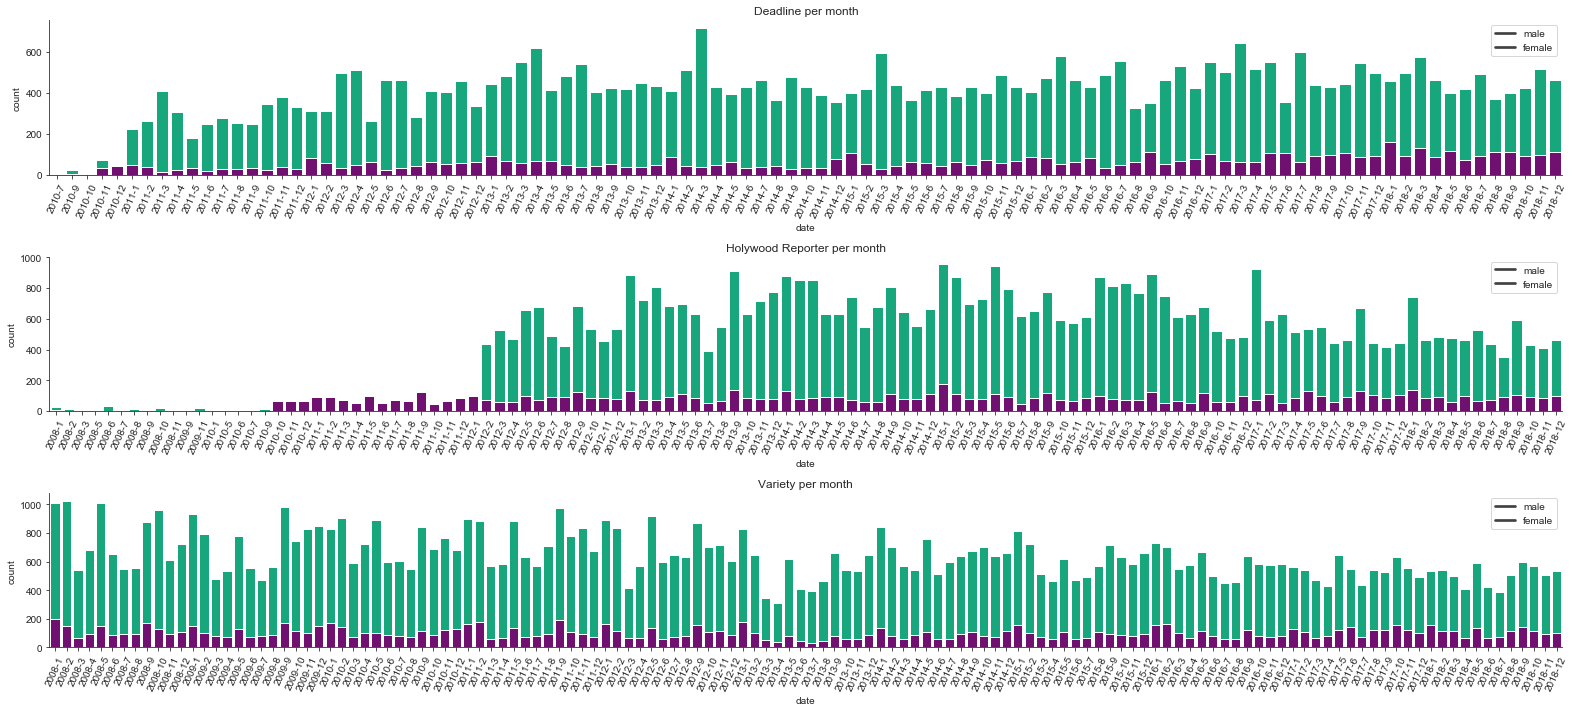

In [20]:
plt.figure(figsize=(22,10))

plt.subplot(3,1,1)
sns.barplot(x='date', y='count', data = male_deadline_month, color = '#00BF85')
sns.barplot(x='date', y='count', data = female_deadline_month, color = 'purple')
plt.title('Deadline per month')
plt.legend(('male', 'female'))
plt.xticks(rotation=65)

plt.subplot(3,1,2)
sns.barplot(x='date', y='count', data = male_hwr_month, color = '#00BF85')
sns.barplot(x='date', y='count', data = female_hwr_month, color = 'purple')
plt.title('Holywood Reporter per month')
plt.legend(('male', 'female'))
plt.xticks(rotation=65)

plt.subplot(3,1,3)
sns.barplot(x='date', y='count', data = male_variety_month, color = '#00BF85')
sns.barplot(x='date', y='count', data = female_variety_month, color = 'purple')
plt.title('Variety per month')
plt.legend(('male', 'female'))
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig('mentions_per_month_barchart.png', dpi=300, format='png')
plt.show()

### Mentions by year

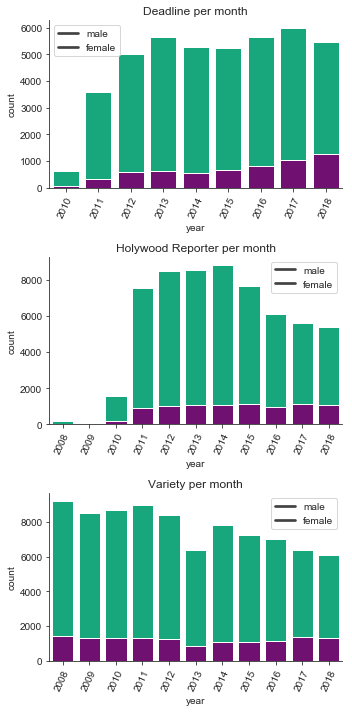

In [66]:
plt.figure(figsize=(5,10))

plt.subplot(3,1,1)
sns.barplot(x='year', y='count', data = male_deadline_month.groupby(['year'], as_index=False).sum(), color = '#00BF85')
sns.barplot(x='year', y='count', data = female_deadline_month.groupby(['year'], as_index=False).sum(), color = 'purple')
plt.title('Deadline per month')
plt.legend(('male', 'female'))
plt.xticks(rotation=65)

plt.subplot(3,1,2)
sns.barplot(x='year', y='count', data = male_hwr_month.groupby(['year'], as_index=False).sum(), color = '#00BF85')
sns.barplot(x='year', y='count', data = female_hwr_month.groupby(['year'], as_index=False).sum(), color = 'purple')
plt.title('Holywood Reporter per month')
plt.legend(('male', 'female'))
plt.xticks(rotation=65)

plt.subplot(3,1,3)
sns.barplot(x='year', y='count', data = male_variety_month.groupby(['year'], as_index=False).sum(), color = '#00BF85')
sns.barplot(x='year', y='count', data = female_variety_month.groupby(['year'], as_index=False).sum(), color = 'purple')
plt.title('Variety per month')
plt.legend(('male', 'female'))
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig('mentions_year_barchart.png', dpi=300, format='png')
plt.show()

### Mentions in 2018 only

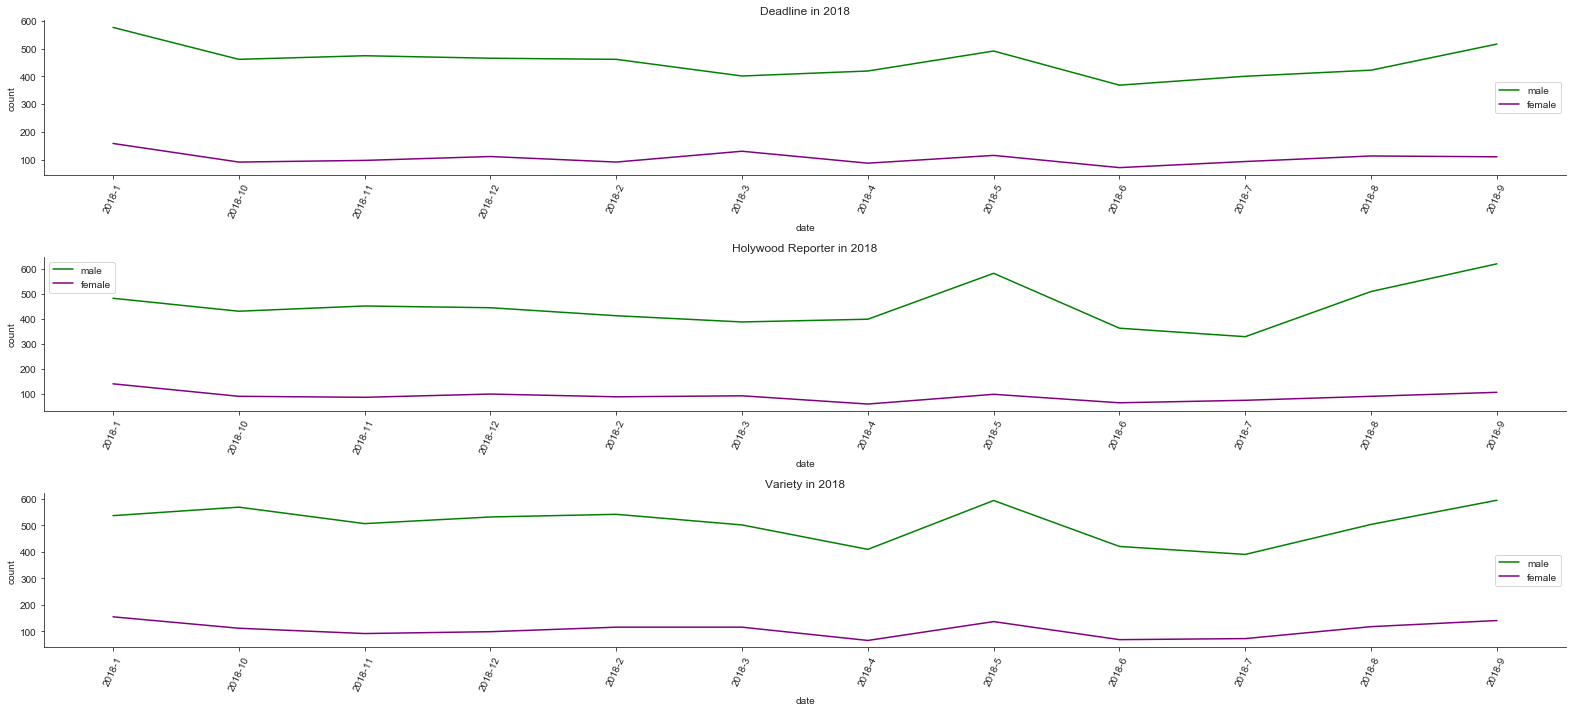

In [50]:
plt.figure(figsize=(22,10))

plt.subplot(3,1,1)
sns.lineplot(x='date', y='count', data = male_deadline_month.loc[male_deadline_month['year'] == 2018], color = 'green')
sns.lineplot(x='date', y='count', data = female_deadline_month.loc[female_deadline_month['year'] == 2018], color = 'purple')
plt.title('Deadline in 2018')
plt.legend(('male', 'female'))
plt.xticks(rotation=65)

plt.subplot(3,1,2)
sns.lineplot(x='date', y='count', data = male_hwr_month.loc[male_hwr_month['year'] == 2018], color = 'green')
sns.lineplot(x='date', y='count', data = female_hwr_month.loc[female_hwr_month['year'] == 2018], color = 'purple')
plt.title('Holywood Reporter in 2018')
plt.legend(('male', 'female'))
plt.xticks(rotation=65)

plt.subplot(3,1,3)
sns.lineplot(x='date', y='count', data = male_variety_month.loc[male_variety_month['year'] == 2018], color = 'green')
sns.lineplot(x='date', y='count', data = female_variety_month.loc[female_variety_month['year'] == 2018], color = 'purple')
plt.title('Variety in 2018')
plt.legend(('male', 'female'))
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig('mentions_2018.png', dpi=300, format='png')
plt.show()

### Top directors